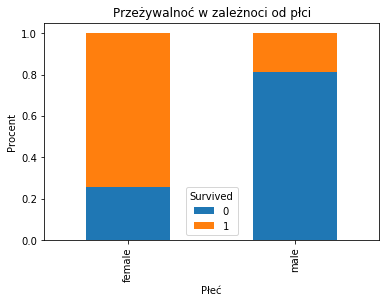

Widoczna jest 3 krotnie większa procentowa przeżywalnoć kobiet



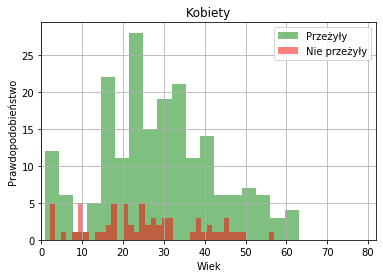

Nnajwiększe szanse przeżycia miały kobiety pomiędzy 14 a 40 rokiem życia.



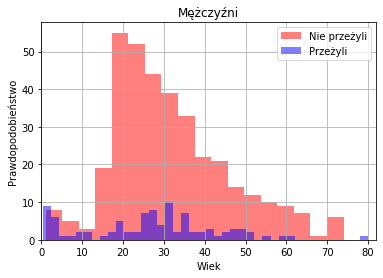

Największe szanse na przeżycie panów były największe dla grupy wiekowejy 18 a 30 rokiem



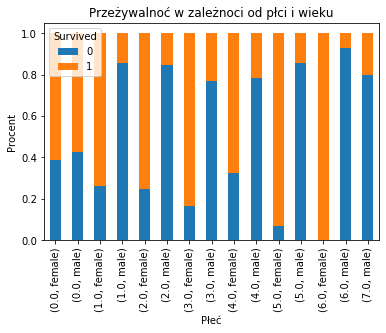

Większa przeżywalnoć kobiet jest widoczna w każdej grupiew wiekowej,
jedynym wyjątkiem są dzieci do 10 roku życia


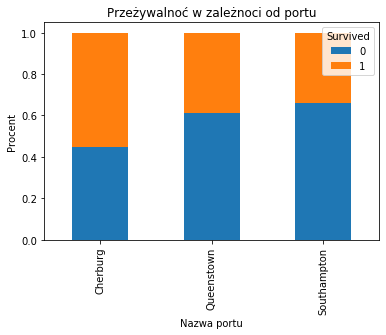

Najszcęliwszym portem zaokretowania jest Cherbourg



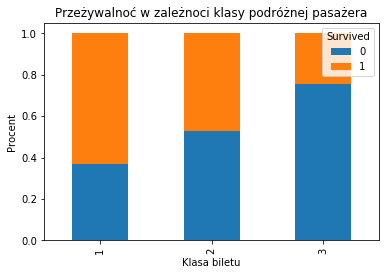

Zakupienie biletu klasy pierwszej dawało 15% więcej szans na przeżycie 

niż w klasie 2 i 30%większą niż w klasie 3.


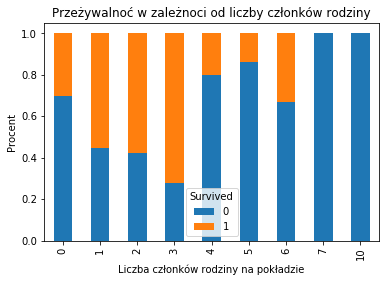

Największe prawdopodobieństwo przeżycia zapewniało 3, 2 lub 1 członków rodziny na pokładzie

Wniosek największe prawdopodobieństwo przeżycia miał paszażer będący:
- kobietą
- podróżująca klasą pierwszą
- która weszła na pokład w Cherburgu
- i posiadała nie więcej niż 3 członków rodziny na pookładzie


In [12]:
# -*- coding: utf-8 -*-
"""
Created on Wed Feb  5 04:22:55 2020

@author: Ryszard.Siwy
"""
import numpy as np 

import pandas as pd 

from matplotlib import pyplot as plt
from matplotlib import style

def get_Port(Embarked):
    if (Embarked == 'S'):
        return 1
    elif (Embarked == 'C'):
        return 2
    elif (Embarked == 'Q'):
        return 3
    else:
        return 1

def get_PortName(Embarked):
    if (Embarked == 'S'):
        return 'Southampton'
    elif (Embarked == 'C'):
        return 'Cherburg'
    elif (Embarked == 'Q'):
        return 'Queenstown'
    else:
        return 'Southampton'

df_titanic = pd.read_csv("train.csv")

#Dodanie kolumny port zawierającej numeryczny odpowiednik nazwy
df_titanic['Port'] = df_titanic['Embarked'].apply(get_Port)

#Zmiana zawartoci kolumny zaokrętowanie z pierwszej litery na pełną nazwę
df_titanic['Embarked'] = df_titanic['Embarked'].apply(get_PortName)

#Dodanie kolumny zawierającej liczbę wszystkich członków rodziny na pokładzie
df_titanic['Family'] = df_titanic['SibSp'] + df_titanic['Parch']

title_xt = pd.crosstab(df_titanic['Sex'], df_titanic['Survived'])
title_xt_pct = title_xt.div(title_xt.sum(1).astype(float), axis=0)
title_xt_pct.plot(kind='bar', 
                  stacked=True, 
                  title='Przeżywalnoć w zależnoci od płci')
plt.xlabel('Płeć')
plt.ylabel('Procent')
plt.savefig('przezywalnoć w podziale na płcie')
plt.show()
print('Widoczna jest 3 krotnie większa procentowa przeżywalnoć kobiet\n')

filter_1 = df_titanic["Survived"] == 1
filter_2 = df_titanic["Sex"] == "female"
women_s = df_titanic.where(filter_1 & filter_2)
filter_1 = df_titanic["Survived"] == 0
filter_2 = df_titanic["Sex"] == "female"
women_n = df_titanic.where(filter_1 & filter_2)
plt.hist(women_s["Age"], bins=18, density=False, alpha=0.5, color='Green')
plt.hist(women_n["Age"], bins=40, density=False, alpha=0.5, color='Red')
plt.legend(["Przeżyły", "Nie przeżyły"])
plt.title("Kobiety")
plt.xlabel("Wiek")
plt.ylabel("Prawdopodobieństwo")
plt.xlim(0,82)
plt.grid(True)
plt.savefig('kobiety_rozklad_wiekowy.png')
plt.show()
print('Nnajwiększe szanse przeżycia miały kobiety pomiędzy 14 a 40 rokiem życia.\n')

filter_1 = df_titanic["Survived"] == 1
filter_2 = df_titanic["Sex"] == "male"
men_s = df_titanic.where(filter_1 & filter_2)
filter_1 = df_titanic["Survived"] == 0
filter_2 = df_titanic["Sex"] == "male"
men_n = df_titanic.where(filter_1 & filter_2)
plt.hist(men_n["Age"], bins=18, density=False, alpha=0.5, color='Red')
plt.hist(men_s["Age"], bins=40, density=False, alpha=0.5, color='Blue')
plt.legend(["Nie przeżyli", "Przeżyli"])
plt.title("Mężczyźni")
plt.xlabel("Wiek")
plt.ylabel("Prawdopodobieństwo")
plt.grid(True)
plt.xlim(0,82)
plt.savefig('mezczyzni_rozklad_wiekowy.png')
plt.show()
print('Największe szanse na przeżycie panów były największe dla grupy wiekowejy 18 a 30 rokiem\n')

#zamiana wieku pasażera w latach na przediaziały wiekowe co 10 lat
df_titanic.loc[ df_titanic['Age'] <= 10, 'Age'] = 0
df_titanic.loc[(df_titanic['Age'] > 10) & (df_titanic['Age'] <= 20), 'Age'] = 1
df_titanic.loc[(df_titanic['Age'] > 20) & (df_titanic['Age'] <= 30), 'Age'] = 2
df_titanic.loc[(df_titanic['Age'] > 30) & (df_titanic['Age'] <= 40), 'Age'] = 3
df_titanic.loc[(df_titanic['Age'] > 40) & (df_titanic['Age'] <= 50), 'Age'] = 4
df_titanic.loc[(df_titanic['Age'] > 50) & (df_titanic['Age'] <= 60), 'Age'] = 5
df_titanic.loc[(df_titanic['Age'] > 60) & (df_titanic['Age'] <= 70), 'Age'] = 6
df_titanic.loc[(df_titanic['Age'] > 60), 'Age'] = 7

title_xt = pd.crosstab([df_titanic['Age'],df_titanic['Sex']], df_titanic['Survived'])
title_xt_pct = title_xt.div(title_xt.sum(1).astype(float), axis=0)
title_xt_pct.plot(kind='bar', 
                  stacked=True, 
                  title='Przeżywalnoć w zależnoci od płci i wieku')
plt.xlabel('Płeć')
plt.ylabel('Procent')
plt.show()
print('Większa przeżywalnoć kobiet jest widoczna w każdej grupiew wiekowej,')
print('jedynym wyjątkiem są dzieci do 10 roku życia')

title_xt = pd.crosstab(df_titanic['Embarked'], df_titanic['Survived'])
title_xt_pct = title_xt.div(title_xt.sum(1).astype(float), axis=0)
title_xt_pct.plot(kind='bar', 
                  stacked=True, 
                  title='Przeżywalnoć w zależnoci od portu')
plt.xlabel('Nazwa portu')
plt.ylabel('Procent')
plt.show()
print('Najszcęliwszym portem zaokretowania jest Cherbourg\n')

title_xt = pd.crosstab([df_titanic['Pclass']],df_titanic['Survived'])
title_xt_pct = title_xt.div(title_xt.sum(1).astype(float), axis=0)
title_xt_pct.plot(kind='bar', 
                  stacked=True, 
                  title='Przeżywalnoć w zależnoci klasy podróżnej pasażera')
plt.xlabel('Klasa biletu')
plt.ylabel('Procent')
plt.show()
print('Zakupienie biletu klasy pierwszej dawało 15% więcej szans na przeżycie \n')
print('niż w klasie 2 i 30%większą niż w klasie 3.')

title_xt = pd.crosstab(df_titanic['Family'], df_titanic['Survived'])
title_xt_pct = title_xt.div(title_xt.sum(1).astype(float), axis=0)
title_xt_pct.plot(kind='bar', 
                  stacked=True, 
                  title='Przeżywalnoć w zależnoci od liczby członków rodziny')
plt.xlabel('Liczba członków rodziny na pokładzie')
plt.ylabel('Procent')
plt.show()
print('Największe prawdopodobieństwo przeżycia zapewniało 3, 2 lub 1 członków rodziny na pokładzie\n')

print('Wniosek największe prawdopodobieństwo przeżycia miał paszażer będący:')
print('- kobietą')
print('- podróżująca klasą pierwszą')
print('- która weszła na pokład w Cherburgu')
print('- i posiadała nie więcej niż 3 członków rodziny na pookładzie')
